# Video Game Sales Analysis

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_clean_data(filepath : str):
    try:
        df = pd.read_csv(filepath)
        df=df.dropna()
        return df
    except FileNotFoundError:
        print(f"File {filepath} not found.")
        exit(1)
    except pd.errors.EmptyDataError:
        print(f"File {filepath} is empty.")
        exit(1)
    except Exception as e:
        print(f"An error occurred while loading data: {e}")
        exit(1)

def get_top_n_games(df,n : int):
    top_games=df.sort_values(by=['Global_Sales'], ascending=False).head(n)
    return top_games

def get_publishers_and_sales(df,n : int):
    sales_by_publisher=df.groupby('Publisher')['Global_Sales'].sum()
    sales_by_publisher=sales_by_publisher.sort_values(ascending=False).head(n)
    return sales_by_publisher

def sales_cor(df,continent1 : str,continent2 : str):
    continent_a=df[continent1]
    continent_b=df[continent2]
    cor=continent_a.corr(continent_b, method='spearman')
    print(f'Correlation between {continent1} and {continent2}: {cor:.4f}')
    sns.regplot(
        x=continent1,
        y=continent2,
        data=df,
        scatter_kws={'alpha': 0.3, 's': 15},
        line_kws={'color': 'red'}
    )

    plt.title(f'Correlation and Regression Line: {continent1} vs {continent2}')
    plt.xlabel(f'{continent1} (mln)')
    plt.ylabel(f'{continent2} (mln)')
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.tight_layout()

    plt.show()

def get_sales_by_genre(df):
    sales_by_genre = df.groupby(df['Genre'])['Global_Sales'].sum()
    sales_by_genre=sales_by_genre.sort_values(ascending=False)
    return sales_by_genre

def plot_bar_chart(data_series, title, x_label):

    labels = data_series.index
    values = data_series.values

    plt.figure(figsize=(10, 6))
    plt.bar(labels, values)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel("Sales (mln)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [19]:
df = load_and_clean_data('data/vgsales.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## Top 5 Games by Global Sales

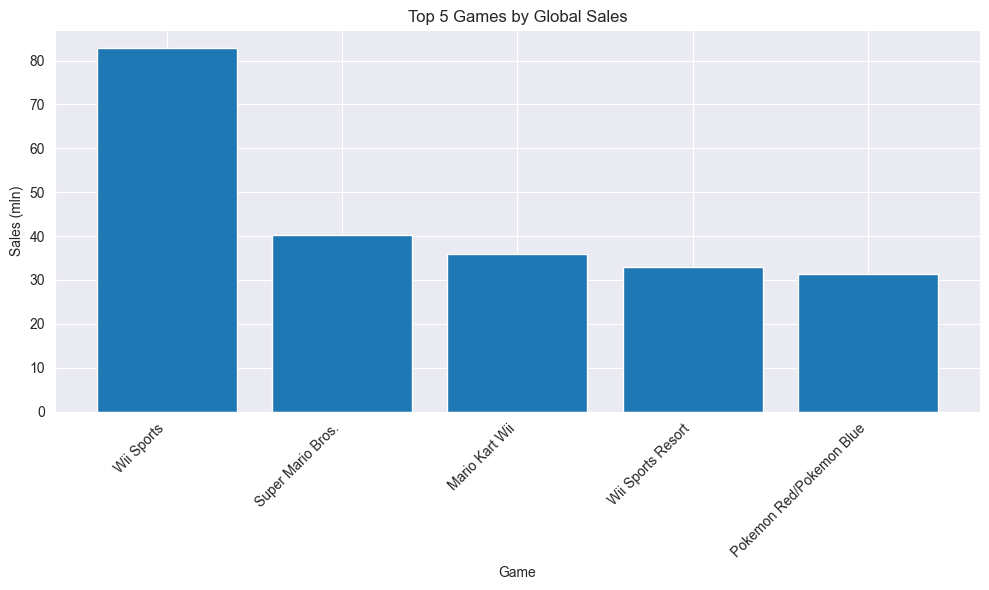

In [20]:
top5_df = get_top_n_games(df, 5)
plot_bar_chart(top5_df.set_index('Name')['Global_Sales'], "Top 5 Games by Global Sales", "Game")

## Top 10 Publishers by Global Sales

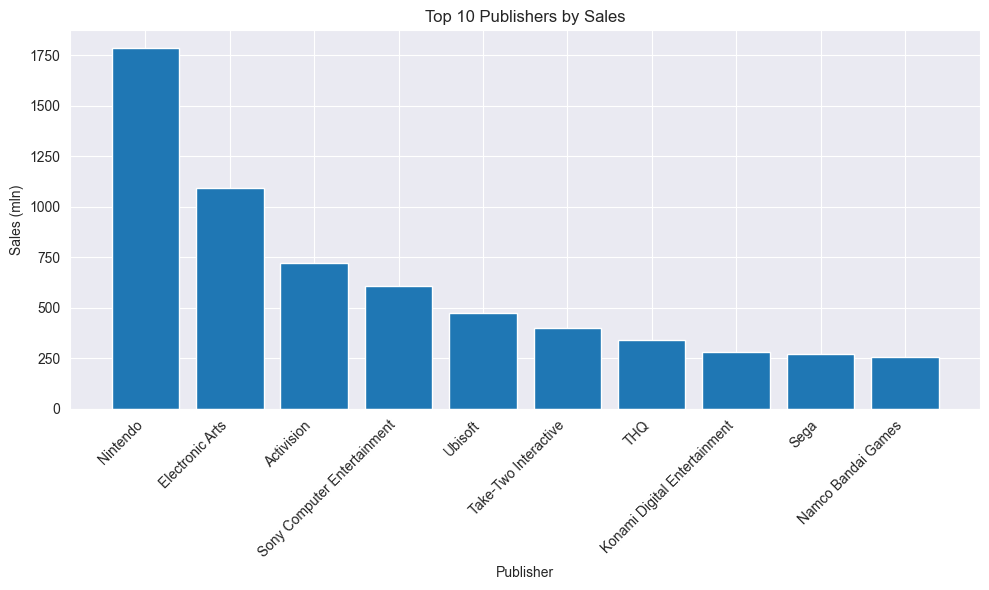

In [21]:
top_publishers = get_publishers_and_sales(df, 10)
plot_bar_chart(top_publishers, "Top 10 Publishers by Sales", "Publisher")

## Global Sales by Genre

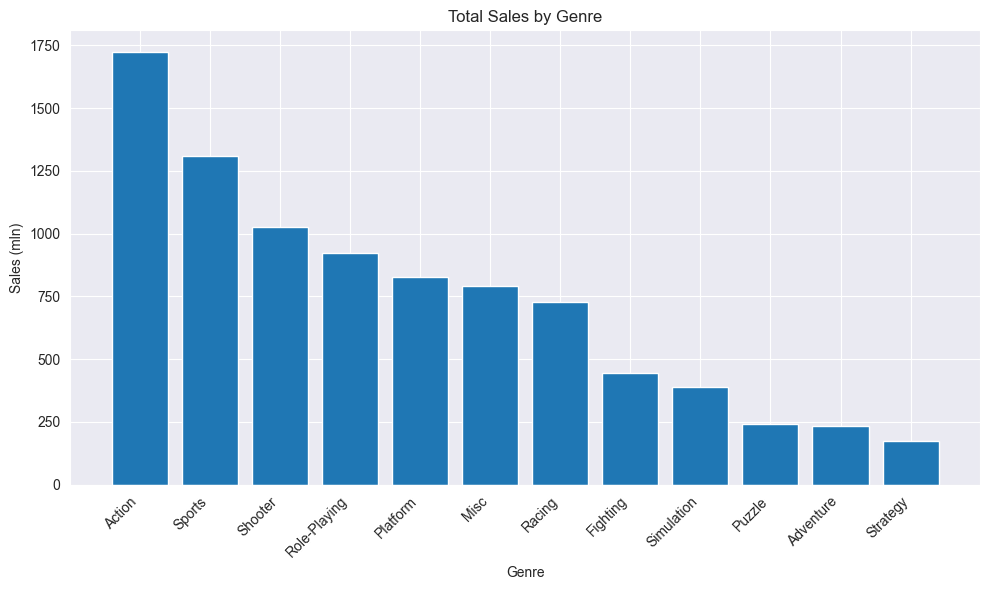

In [22]:
genre_sales = get_sales_by_genre(df)
plot_bar_chart(genre_sales, "Total Sales by Genre", "Genre")

## Sales Correlation: Europe vs. North America

Correlation between EU_Sales and NA_Sales: 0.6832


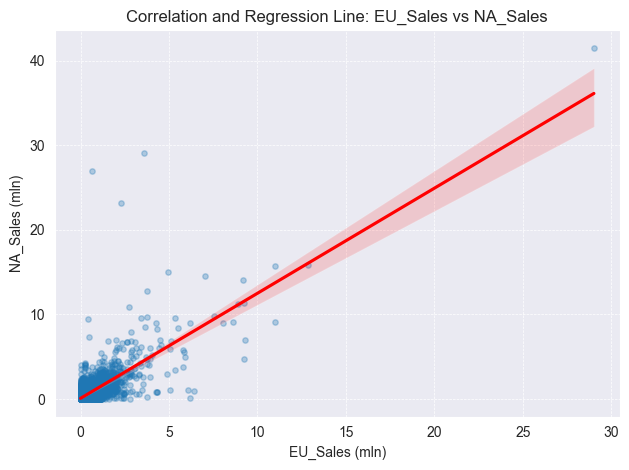

In [23]:
sales_cor(df, 'EU_Sales', 'NA_Sales')

## Conclusions
-Action and Sports are the highest-grossing genres.
-Publishers like Nintendo and Electronic Arts dominate the global market.
-There is a strong positive correlation between game sales in Europe and North America, suggesting similar market preferences.